In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('recomendation.xlsx')
df.head(3)

,UserID,ItemID,Rating,PurchaseHistory,CartActivity,WishlistActivity,Clicks,Views,TimeSpentOnItem,PurchaseDate,...,Brand,Description,Tags,Color,Size,Stock,Ratings,Reviews,ReleaseDate,PopularityScore
0,U03449,Item00047,2,"['Item861', 'Item859', 'Item901']","['Item558', 'Item663']","['Item885', 'Item199']",3,42,280.46,NaT,...,"Ramos, Johnson and Bell",Find Mrs family guess camera image decide able...,['event'],White,M,24,3.9,Happen so late space nothing fill mouth health...,2020-09-22,38.13
1,U01475,Item00360,3,"['Item410', 'Item741']","['Item436', 'Item720', 'Item72']",['Item916'],19,8,286.83,NaT,...,Hall-Spencer,Research seat suggest story career interesting...,['market'],Blue,S,139,1.6,Establish book write education score its hot y...,2021-11-20,5.44
2,U02136,Item00685,4,"['Item615', 'Item954', 'Item214', 'Item199']","['Item949', 'Item227']",['Item65'],10,45,73.91,NaT,...,"Young, Johnston and Becker",Than available marriage before paper bank nati...,"['major', 'usually', 'choose', 'idea', 'give']",Red,L,116,3.2,Three detail college sing rule able law finall...,2019-11-14,18.93


Here's a simple breakdown of each feature in our dataset:

1. **UserID**: A unique number for each person using the app or website.
2. **ItemID**: A unique number for each product.
3. **Rating**: The rating a user gives a product, usually between 1 to 5 stars.
4. **PurchaseHistory**: A record of the products a user has bought before.
5. **CartActivity**: Information about items the user has put in their shopping cart.
6. **WishlistActivity**: Information about items the user has saved to buy later.
7. **Clicks**: The number of times the user has clicked on products.
8. **Views**: How many times the user has viewed products.
9. **TimeSpentOnItem**: Time the user spent looking at a particular item.
10. **PurchaseDate**: The date a user bought a product.
11. **SessionDuration**: Total time the user spends on the app or website in one go.
12. **DeviceType**: Type of device used, like a phone, tablet, or computer.
13. **AbandonedCartData**: Items added to the cart but not bought.
14. **Age**: The user’s age.
15. **Gender**: The user’s gender (male, female, etc.).
16. **Location**: The area or region where the user lives.
17. **Income**: The user’s income level.
18. **Occupation**: The user’s job or profession.
19. **SignUpDate**: The date when the user created their account.
20. **MembershipLevel**: The user’s level or type of membership (like regular or premium).
21. **BrowsingHistory**: A list of products the user has viewed before.
22. **Device**: Specific details about the device used, like brand or model.
23. **TimeOfInteraction**: The time when the user interacted with a product.
24. **SearchQueries**: Words or phrases the user searched for in the app.
25. **ProductName**: The name of the product.
26. **Category**: Type or group the product belongs to, like electronics or clothing.
27. **Price**: The cost of the product.
28. **Discount**: The amount or percentage off the regular price.
29. **Brand**: The company that makes the product.
30. **Description**: Details or features of the product.
31. **Tags**: Keywords that describe the product, like "new" or "on sale."
32. **Color**: The color of the product.
33. **Size**: The size of the product, if it varies (like small, medium, large).
34. **Stock**: The number of products available to buy.
35. **Ratings**: Average rating for the product based on all user reviews.
36. **Reviews**: Comments or feedback from users who have bought the product.
37. **ReleaseDate**: The date the product was made available for sale.
38. **PopularityScore**: A score showing how popular the product is among users.

These features help understand what users like, their buying behavior, and details about each product!

Let's break it down in simpler terms:

1. **CartActivity**: Think of it as all the actions someone does with their shopping cart. It could be:
   - Adding items to the cart.
   - Removing items from the cart.
   - Going to the checkout page to buy items.

   So, CartActivity includes everything related to using the cart, whether they buy the item or not.

2. **AbandonedCartData**: This only shows items that people put in their cart but didn’t end up buying. Imagine putting something in your cart and then leaving the website without buying it. That’s an "abandoned cart" — items that were left behind without a purchase.

In short:
- **CartActivity** = All actions with the cart (adding, removing, buying).
- **AbandonedCartData** = Items added to the cart but **not bought**.

In [3]:
df.shape


(5000, 38)

In [4]:
df.columns

Index(['UserID', 'ItemID', 'Rating', 'PurchaseHistory', 'CartActivity',
       'WishlistActivity', 'Clicks', 'Views', 'TimeSpentOnItem',
       'PurchaseDate', 'SessionDuration', 'DeviceType', 'AbandonedCartData',
       'Age', 'Gender', 'Location', 'Income', 'Occupation', 'SignUpDate',
       'MembershipLevel', 'BrowsingHistory', 'Device', 'TimeOfInteraction',
       'SearchQueries', 'ProductName', 'Category', 'Price', 'Discount',
       'Brand', 'Description', 'Tags', 'Color', 'Size', 'Stock', 'Ratings',
       'Reviews', 'ReleaseDate', 'PopularityScore'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   UserID             5000 non-null   object        
 1   ItemID             5000 non-null   object        
 2   Rating             5000 non-null   int64         
 3   PurchaseHistory    5000 non-null   object        
 4   CartActivity       5000 non-null   object        
 5   WishlistActivity   5000 non-null   object        
 6   Clicks             5000 non-null   int64         
 7   Views              5000 non-null   int64         
 8   TimeSpentOnItem    5000 non-null   float64       
 9   PurchaseDate       2461 non-null   datetime64[ns]
 10  SessionDuration    5000 non-null   float64       
 11  DeviceType         5000 non-null   object        
 12  AbandonedCartData  5000 non-null   object        
 13  Age                5000 non-null   int64         
 14  Gender  

In [6]:
df.isnull().sum()

UserID                  0
ItemID                  0
Rating                  0
PurchaseHistory         0
CartActivity            0
WishlistActivity        0
Clicks                  0
Views                   0
TimeSpentOnItem         0
PurchaseDate         2539
SessionDuration         0
DeviceType              0
AbandonedCartData       0
Age                     0
Gender                  0
Location                0
Income                  0
Occupation              0
SignUpDate              0
MembershipLevel         0
BrowsingHistory         0
Device                  0
TimeOfInteraction       0
SearchQueries           0
ProductName             6
Category                0
Price                   0
Discount                0
Brand                   0
Description             0
Tags                    0
Color                   0
Size                  946
Stock                   0
Ratings                 0
Reviews                 0
ReleaseDate             0
PopularityScore         0
dtype: int64

In [7]:
df.describe(include='all')

,UserID,ItemID,Rating,PurchaseHistory,CartActivity,WishlistActivity,Clicks,Views,TimeSpentOnItem,PurchaseDate,SessionDuration,DeviceType,AbandonedCartData,Age,Gender,Location,Income,Occupation,SignUpDate,MembershipLevel,BrowsingHistory,Device,TimeOfInteraction,SearchQueries,ProductName,Category,Price,Discount,Brand,Description,Tags,Color,Size,Stock,Ratings,Reviews,ReleaseDate,PopularityScore
count,5000,5000,5000.000000,5000,5000,5000,5000.000000,5000.000000,5000.000000,2461,5000.000000,5000,5000,5000.000000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,4994,5000,5000.000000,5000.000000,5000,5000,5000,5000,4054,5000.000000,5000.00000,5000,5000,5000.000000
unique,3132,993,NaN,4646,4180,4488,NaN,NaN,NaN,NaN,NaN,2,3430,NaN,3,3127,3,634,NaN,3,3088,3,4,2959,616,5,NaN,NaN,963,993,974,6,4,NaN,NaN,993,NaN,NaN
top,U02127,Item00819,NaN,['Item703'],['Item933'],['Item507'],NaN,NaN,NaN,NaN,NaN,Desktop,['Item526'],NaN,Female,"Davidfort, UY",Medium,"Radiographer, diagnostic",NaN,Regular,['Item171'],Mobile,Evening,['act'],Charge,Books,NaN,NaN,Johnson Group,Pull we media author poor you kind statement s...,['century'],Black,XL,NaN,NaN,Popular human here various human Democrat youn...,NaN,NaN
freq,6,13,NaN,5,6,6,NaN,NaN,NaN,NaN,NaN,2536,9,NaN,2272,6,2528,20,NaN,2999,7,2904,1534,8,27,1109,NaN,NaN,21,13,16,980,1183,NaN,NaN,13,NaN,NaN
mean,NaN,NaN,2.997000,NaN,NaN,NaN,10.411000,25.628400,152.262276,2024-06-04 03:21:25.892726528,60.553086,NaN,NaN,43.813600,NaN,NaN,NaN,NaN,2022-04-24 05:44:26.880000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.260204,14.824172,NaN,NaN,NaN,NaN,NaN,102.292800,2.98926,NaN,2022-06-11 15:33:07.200000,49.524056
min,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000,1.000000,1.030000,2024-01-01 03:21:58,1.090000,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,2019-11-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.340000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,1.00000,NaN,2019-11-06 00:00:00,0.110000
25%,NaN,NaN,2.000000,NaN,NaN,NaN,5.000000,13.000000,77.640000,2024-03-19 00:27:40,30.805000,NaN,NaN,31.000000,NaN,NaN,NaN,NaN,2021-01-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,271.700000,7.010000,NaN,NaN,NaN,NaN,NaN,53.750000,2.00000,NaN,2021-03-12 00:00:00,22.310000
50%,NaN,NaN,3.000000,NaN,NaN,NaN,10.000000,26.000000,152.440000,2024-06-01 19:40:12,60.660000,NaN,NaN,44.000000,NaN,NaN,NaN,NaN,2022-04-24 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,502.470000,14.640000,NaN,NaN,NaN,NaN,NaN,102.000000,3.00000,NaN,2022-07-21 00:00:00,49.590000
75%,NaN,NaN,4.000000,NaN,NaN,NaN,16.000000,38.000000,228.695000,2024-08-21 21:11:59,90.027500,NaN,NaN,56.000000,NaN,NaN,NaN,NaN,2023-07-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,727.690000,22.840000,NaN,NaN,NaN,NaN,NaN,153.000000,4.00000,NaN,2023-10-05 00:00:00,75.980000
max,NaN,NaN,5.000000,NaN,NaN,NaN,20.000000,50.000000,299.830000,2024-11-04 23:52:44,119.980000,NaN,NaN,69.000000,NaN,NaN,NaN,NaN,2024-11-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,997.960000,29.990000,NaN,NaN,NaN,NaN,NaN,199.000000,5.00000,NaN,2024-11-03 00:00:00,99.960000


In [8]:
df['UserID'].value_counts().head(10)   # user id was repeated top 10 userId in term of frequency.

UserID
U02127    6
U02608    6
U03042    5
U00845    5
U02538    5
U01578    5
U03288    5
U00873    5
U00645    5
U00236    5
Name: count, dtype: int64

# Purchase Behaviour analysis

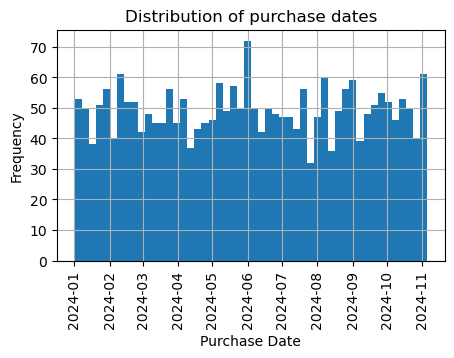

In [9]:
# Check distribution of PurchaseDate (only non-null values)
plt.figure(figsize=(5,3))
df['PurchaseDate'].dropna().hist(bins=50)
plt.title('Distribution of purchase dates')
plt.xlabel('Purchase Date')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

Here are precise insights from the graph:

1. **Consistent Purchasing**: Purchases are steady throughout the year, suggesting non-seasonal buying behavior. Recommendations can remain stable without heavy seasonal adjustments.
  
2. **Peak Month (June)**: June has a noticeable spike in purchases, possibly due to sales or events. Tailor recommendations for this period to maximize engagement.

3. **Low Activity Periods**: Slight dips in April and August. Consider strategies like discounts or reminders to boost purchases during these months.

4. **Stable Demand**: Regular buying habits imply that historical data-based recommendations will remain relevant over time.

In [10]:
# we can Analyzing cart abandonment by checking for AbandonedCartData entries
print("Unique values in AbandonedCartData:\n", df['AbandonedCartData'].value_counts())

Unique values in AbandonedCartData:
 AbandonedCartData
['Item526']               9
['Item385']               8
['Item506']               8
['Item62']                8
['Item416']               8
                         ..
['Item567', 'Item779']    1
['Item464', 'Item910']    1
['Item152', 'Item389']    1
['Item921', 'Item443']    1
['Item612', 'Item844']    1
Name: count, Length: 3430, dtype: int64




1. **Popular Abandoned Items**: Items like **Item526** and **Item385** are often left in carts. These items might need adjustments (like price or features) to encourage purchases.

2. **Multiple Items Left Together**: Some users abandon two items together. Offering bundle discounts might help convince them to buy.

3. **Rarely Abandoned Items**: Most items are rarely left in carts, so focus on improving the frequently abandoned ones.

4. **Opportunity for Reminders**: For items often left in carts, try sending reminders or discounts to encourage users to complete their purchase.

# Engagement Metrics

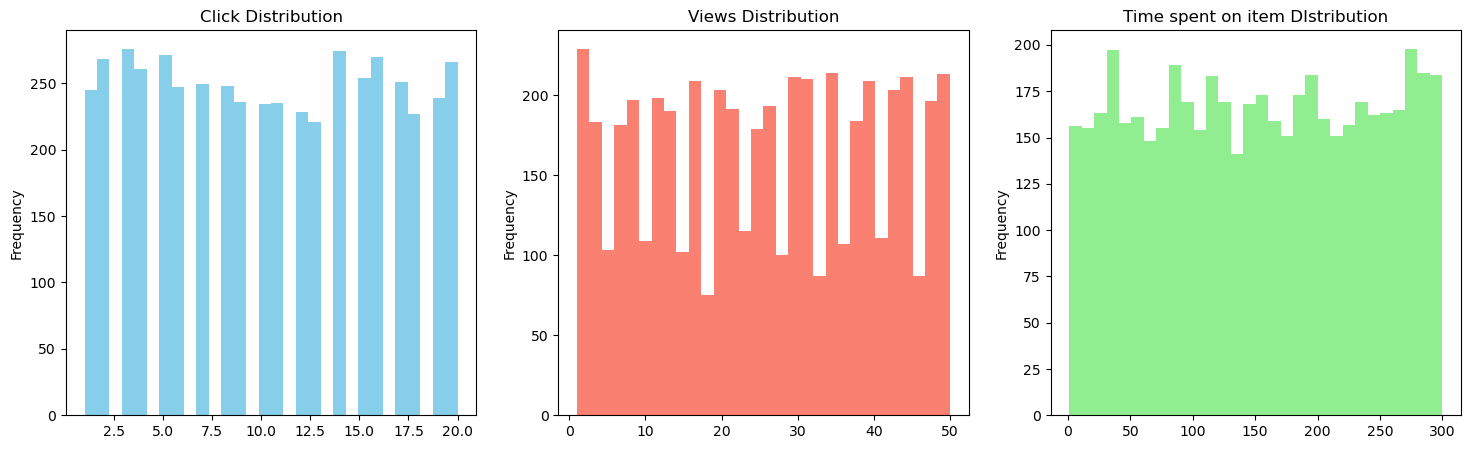

In [11]:
# First we can plot a histogram of clicks
fig,axes = plt.subplots(1,3,figsize=(18,5))
df['Clicks'].plot(kind='hist',ax=axes[0],bins=30,color='skyblue')
axes[0].set_title('Click Distribution')

df['Views'].plot(kind='hist',ax=axes[1],bins=30,color='salmon')
axes[1].set_title('Views Distribution')

df['TimeSpentOnItem'].plot(kind='hist',ax=axes[2],bins=30,color='lightgreen')
axes[2].set_title('Time spent on item DIstribution')
plt.show()

- **Above Graphs Insights**
1. **Clicks**: People are clicking on many different products, which shows varied interests. **Suggest items that similar users have clicked on** to match each person's browsing style.

2. **Views**: Some products are viewed a lot more than others. **Show popular products** to grab attention, especially for new visitors who might not know what to look for.

3. **Time Spent**: When users spend more time looking at a product, it likely means they’re interested. **Recommend items with longer view times** since they might be closer to what people want to buy.

# Demographics Overview

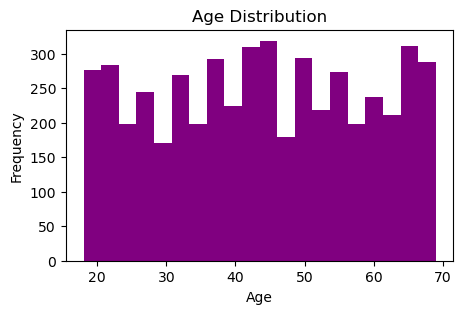

In [12]:
# Distribution of Age
plt.figure(figsize=(5,3))
df['Age'].plot(kind='hist',bins=20,color='purple')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

- Insights Based on the **Age Distribution** histogram:

1. **Broad Age Range**: The age distribution is fairly uniform from ages 20 to 70, with no significant age group dominating. This indicates a diverse customer base in terms of age.

2. **Recommendation Potential**: Since people of all ages are represented, the recommendation system could benefit from age-based personalization. For example, items can be tailored or highlighted based on popular trends within specific age groups.

3. **Targeted Marketing**: Age-specific recommendations, such as youth-oriented products for younger users and lifestyle products for older users, might improve engagement and relevance.

In [13]:
gender_counts = df['Gender'].value_counts()
gender_counts

Gender
Female    2272
Male      2264
Other      464
Name: count, dtype: int64

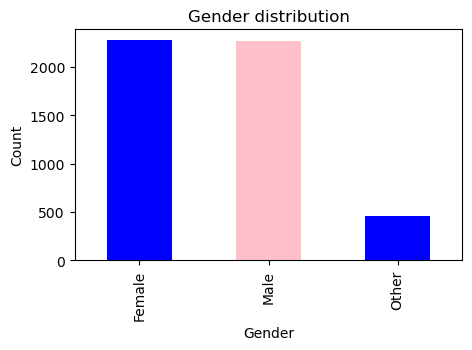

In [14]:
# Gender distribution
plt.figure(figsize=(5,3))
gender_counts.plot(kind='bar',color = ['blue','pink'])
plt.title('Gender distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

- **Insights From other graphs**

1. **More Female Users**: Most users are female, with over 2000 people.

2. **High Male Users**: The number of male users is slightly below females, also close to 2000.

3. **Smaller "Other" Group**: There’s a small number of users identifying as "Other."

4. **Recommendation Insights**: Since female and male users are almost equal, recommendations can be personalized for each gender. The smaller "Other" group should also be considered to make the recommendations inclusive.

In [15]:
# Now we can Explore Income levels
income_counts = df['Income'].value_counts()
income_counts

Income
Medium    2528
Low       1434
High      1038
Name: count, dtype: int64

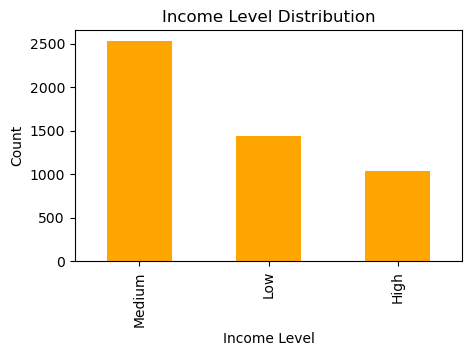

In [16]:
plt.figure(figsize=(5,3))
income_counts.plot(kind='bar',color='orange')
plt.title('Income Level Distribution')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.show()


**Above Graph Insights**

- Most of your customers have an average income. You should focus on recommending products to these people to make more money. 

- There are also a smaller number of customers with very low and very high incomes. You can offer special products or deals to attract these customers. 


# Product Attributes and Pricing

In [17]:
avg_price_by_category = df.groupby('Category')['Price'].mean()
avg_price_by_category

Category
Books          496.041858
Electronics    527.088754
Fashion        495.018078
Home Decor     510.800024
Sports         474.876132
Name: Price, dtype: float64

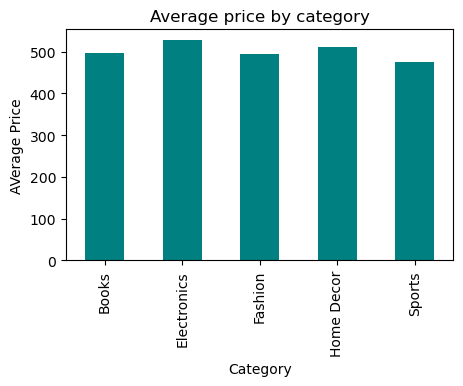

In [18]:
plt.figure(figsize=(5,3))
avg_price_by_category.plot(kind='bar',color='teal')
plt.title('Average price by category')
plt.xlabel('Category')
plt.ylabel('AVerage Price')
plt.show()

- **Electronics** and **Home Decor** have the highest average prices.
- **Books** and **Fashion** follow closely with slightly lower average prices.
- **Sports** has the lowest average price among the categories.
- Price differences across categories are minimal, indicating consistent average pricing.

In [19]:
top_brands = df['Brand'].value_counts().head(10)
top_brands

Brand
Johnson Group         21
Ingram Ltd            19
Brown PLC             19
Smith-Williams        19
Rodriguez and Sons    17
Smith Inc             14
Brown Ltd             14
Galvan-Rodriguez      13
Morgan and Sons       13
Brooks Group          12
Name: count, dtype: int64

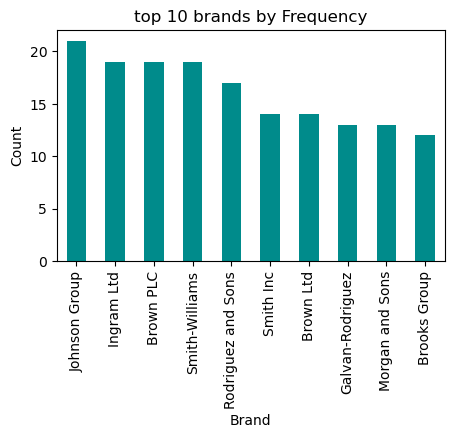

In [20]:
plt.figure(figsize=(5,3))
top_brands.plot(kind='bar',color='darkcyan')
plt.title('top 10 brands by Frequency')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

Here are insights based on the bar chart:

- **Johnson Group** has the highest frequency, indicating it is the most common or popular brand among the top 10.
- **Ingram Ltd**, **Brown PLC**, and **Smith-Williams** follow closely behind Johnson Group in terms of frequency.
- **Rodriguez and Sons** and **Smith Inc** also have notable frequencies but slightly lower than the top four brands.
- **Galvan-Rodriguez**, **Morgan and Sons**, and **Brooks Group** have the lowest frequencies within the top 10.
- The distribution suggests that while Johnson Group leads, there’s a relatively close competition among the other brands in terms of frequency.

# Popularity and Ratings

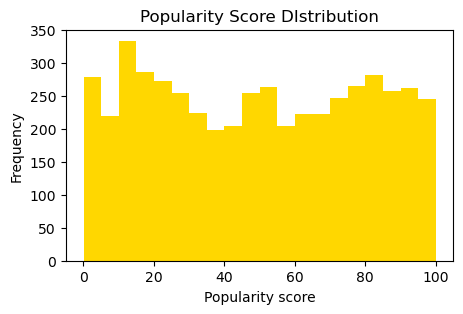

In [21]:
# Distribution of Popularity Scores.
plt.figure(figsize=(5,3))
df['PopularityScore'].plot(kind='hist',bins=20,color='gold')
plt.title('Popularity Score DIstribution')
plt.xlabel('Popularity score')
plt.ylabel('Frequency')
plt.show()

- **Insights from the histogram:**

- The **popularity scores** are fairly evenly distributed, with frequencies ranging from around 200 to 350 across different score intervals.
- The **20-30 score range** has the highest frequency, indicating more items or entities fall within this popularity score range.
- Scores from **30 to 70** have slightly lower but still consistent frequencies, showing moderate popularity.
- The **0-10** and **90-100** score ranges have lower frequencies, suggesting fewer items are at the extremes of popularity.
- Overall, there’s a balanced distribution, with no single popularity score range overwhelmingly dominant.

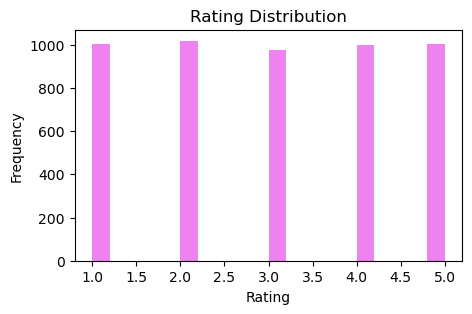

In [22]:
plt.figure(figsize=(5,3))
df['Rating'].plot(kind='hist',bins=20,color='violet')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Purchase and Release Dates

In [23]:
# Sign-up trend by month and year
df['SignUpMonthYear'] = df['SignUpDate'].dt.to_period('M')
signup_trend = df['SignUpMonthYear'].value_counts().sort_index()
signup_trend

SignUpMonthYear
2019-11    94
2019-12    85
2020-01    96
2020-02    71
2020-03    82
           ..
2024-07    73
2024-08    70
2024-09    89
2024-10    96
2024-11     7
Freq: M, Name: count, Length: 61, dtype: int64

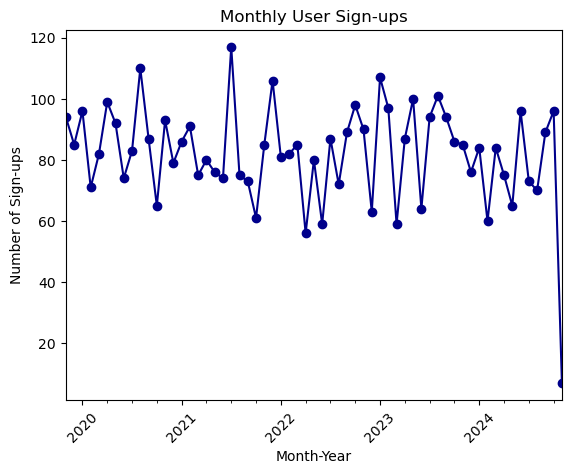

In [24]:
signup_trend.plot(kind='line', color='darkblue', marker='o')
plt.title('Monthly User Sign-ups')
plt.xlabel('Month-Year')
plt.ylabel('Number of Sign-ups')
plt.xticks(rotation=45)
plt.show()

In [25]:
# Release Date trend by month-year
df['ReleaseMonthYear'] = df['ReleaseDate'].dt.to_period('M')
release_trend = df['ReleaseMonthYear'].value_counts().sort_index()
release_trend

ReleaseMonthYear
2019-11     71
2019-12     66
2020-01     70
2020-02     96
2020-03    122
          ... 
2024-07     96
2024-08     86
2024-09     90
2024-10     90
2024-11     10
Freq: M, Name: count, Length: 61, dtype: int64

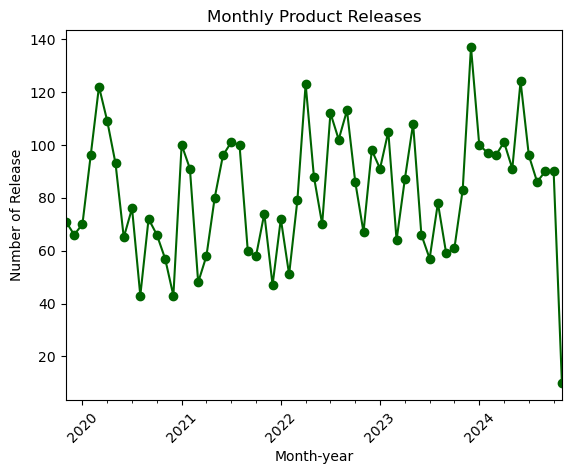

In [26]:

release_trend.plot(kind='line',color='darkgreen',marker='o')
plt.title('Monthly Product Releases')
plt.xlabel('Month-year')
plt.ylabel('Number of Release')
plt.xticks(rotation=45)
plt.show()

# Correlations between User Interaction Metrics and Purchase Behavior

In [27]:
# Correlation matrix of key user interaction metrics
interaction_metrics = df[['Clicks','Views','TimeSpentOnItem','SessionDuration','Ratings','PopularityScore']]
correlation_matrix = interaction_metrics.corr()

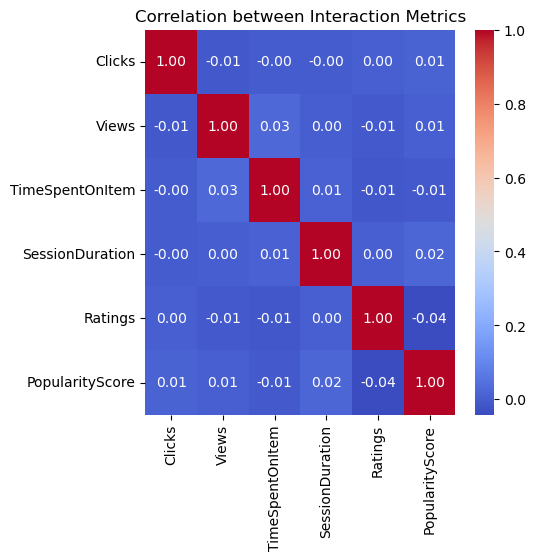

In [28]:
# Heatmap for visual correlation analysis
plt.figure(figsize=(5,5))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt = '.2f')
plt.title('Correlation between Interaction Metrics')
plt.show()

# Pricing and Popularity Correlation

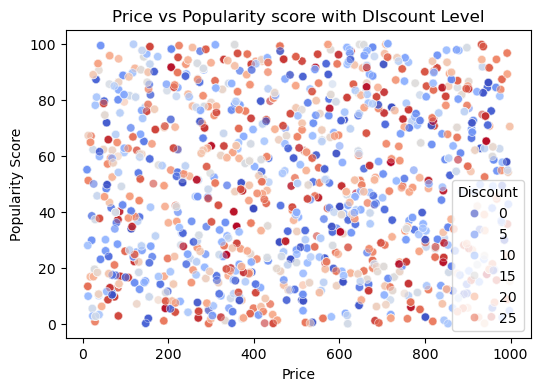

In [29]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Price',y='PopularityScore',data=df,hue='Discount',palette = 'coolwarm',alpha = 0.6)
plt.title('Price vs Popularity score with DIscount Level')
plt.xlabel('Price')
plt.ylabel('Popularity Score')
plt.show()

In [30]:
import pandas as pd

# Sample data for demonstration
# df = pd.DataFrame({
#     'product_name': ['Product A', 'Product B', 'Product A', 'Product C', ...],
#     'clicks': [1, 2, 1, 1, ...]
# })

# Group by 'product_name' and sum up the 'clicks' for each product
product_clicks = df.groupby('product_name')['clicks'].sum().reset_index()

# Sort by the summed 'clicks' in descending order
top_clicked_items = product_clicks.sort_values(by='clicks', ascending=False)

# Get the top 10 items
top_10_items = top_clicked_items.head(10)

# Display the result
print(top_10_items)


KeyError: 'product_name'

# Top 10 CLicked Product Item ID.

In [ ]:
# now we can Group by 'ItemID' and sum up the 'clicks' for each product
product_clicks = df.groupby('ItemID')['Clicks'].sum().reset_index()
product_clicks.head()

In [ ]:
# Sort by the summed 'clicks' in descending order
# Top 10 clicked Item
top_10_clicked_item = product_clicks.sort_values(by='Clicks',ascending=False)
top_10_clicked_item.head(10)

In [ ]:
top_10_clicked_item.head(10).plot(kind='bar',color='red')
plt.title('top 10 clicked item')
plt.xlabel('Item ID')
plt.ylabel('Number of clicks')
plt.show()

In [ ]:
df['TimeSpentOnItem']